# Simple Neural Net: Feed forward proof of concept

This notebook will be a rudimentary python implementation of a simple neural network. This network will be assumed to be prefit with set values for weights and biases. The purpose of this network is to what a neural network is, and how it goes from input to output.

At the most basic level neural network is essentially a function; you put something in and you get something out.

If we go into a bit more technical detail, we have that the input data is sent to different boxes called "nodes" (the intermediary squares in the diagram below). Inside these nodes we apply a different predetermined maths function (called the activation function - represented by the small curves in the node boxes) to the input to get something else out. This activation function will basically summarise the data it receives to keep things simple in the system. The final thing is that when data travels from the input to a node or from one node to another, we mulitply it by a chosen value called the "weight" and then we add a different chosen value called the "bias". If we follow the data from the input down all of the paths in the network, applying weights, biases and activation functions as we go, then we will reach the end at the output cell and we'll have a result.

The ideas in this notebook are taken from the youtube video: Youtube: Statquest - Neural Networks Pt. 1: Inside the Black Box https://www.youtube.com/watch?v=CqOfi41LfDw&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=2

The neural network we'll look at in this notebook is going to consist of a single layer with two nodes. We will be using a softplus activation function. There will be 4 weights and 3 biases, located as shown in the diagram below. 

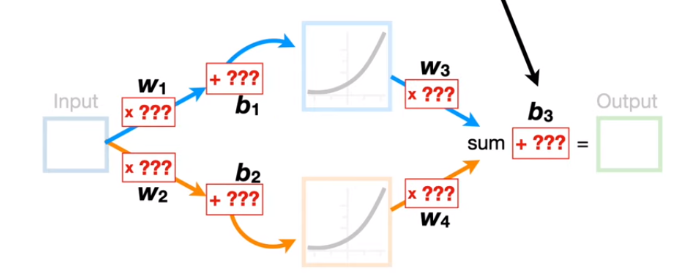
Source: Youtube: Statquest - Neural Networks Pt. 2: Backpropagation Main Ideas   https://www.youtube.com/watch?v=IN2XmBhILt4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=5

In [24]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

The neural network will...


The network will start at the input, this input is one dimensional and will be sent down two paths(blue and orange in the diagram). in each path, we will apply the weights, biases and the instances of the activation function in the order represented in the diagram.


In [25]:
def activation(x):
    '''
    this is our softplus activation function
    it is 1 dimensional in input and output
    '''
    return np.log(1+ np.exp(x))

In [43]:
def NN(x):
    '''
    this function runs a value x through our NN
    it will sequentially apply the weigths, biases
    and instances of the activation function, as well
    as managing divergence and convergence of paths
    in the network.
    '''

    #the ith weight is stored in weights[i-1]
    #the ith bias is stored in biases[i-1]
    #initialise weights
    weights = [-30, -2.5, -1.3, 2.3]
    #initialise biases
    biases = [2, 1.3, -0.78]
    
    
    #firstly x will diverge into two paths
    #we will name these p_1 and p_2
    
    
    #path 1 calculation
    p_1 = activation(weights[0] * x + biases[0]) * weights[2] 
    #path 2 calculation
    p_2 = activation(weights[1] * x + biases[1]) * weights[3] 
    
    #bring the paths back together through summation
    y = p_1 + p_2 
    
    #add the final bias
    y += biases[2]
    
    return y
    

In [44]:
print(NN(0.5))

0.8724542520056506


In [45]:
x = np.linspace(0,1,101)
y = NN(x)


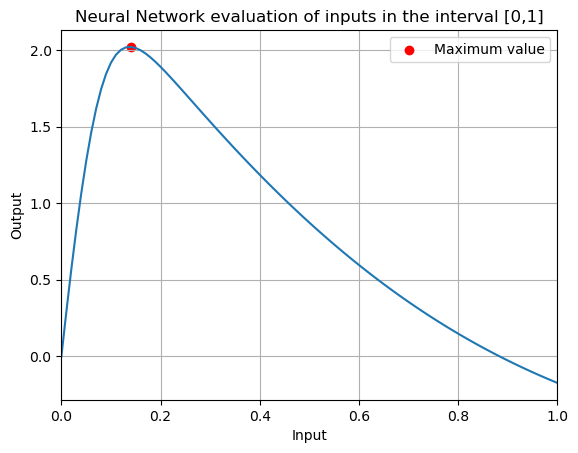

In [55]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Neural Network evaluation of inputs in the interval [0,1]')
#plot the maximum value
ax.scatter(x[np.argmax(y)], max(y), color = 'r', label = 'Maximum value')
ax.set_ylabel('Output')
ax.set_xlabel('Input')
ax.set_xlim(0,1)

ax.legend()
ax.grid()

The Network produces a smooth curve from the input interval. In an actual neural network, this curve would be used to asses a hypothesis on the input function. The weghts and biases are trained on data like similar machine learning models using a process called back-propogation. We will discuss this in the next notebook.